# About Dataset
Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. It also owns and operates Sam's Club retail warehouses. In India, Walmart operates under the name of Flipkart Wholesale.

As of July 31, 2022, Walmart has 10,585 stores and clubs in 24 countries, operating under 46 different names. Out of which we have chosen 45 stores for basic analysis.

Walmart is the world's largest company by revenue, with about US$570 billion in annual revenue, according to the Fortune Global 500 list in May 2022.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
import matplotlib.pyplot as plt
plt.figure #to solve error of pt has no attribute figure
import seaborn as sns
import plotly.express as px 
##%matplotlib inline 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
from statsmodels.graphics.tsaplots import plot_predict
from sklearn import metrics 


## Data Exploration

In [2]:
# Load the Dataset.
df = pd.read_csv("/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# convert Date column type to date-time
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


### Weekly Sales over time.

In [12]:
# Group weekly sales by date column.
weekly_sales_by_date = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_date

,Date,Store,Weekly_Sales
0,2010-02-05,1,1643690.90
1,2010-02-05,2,2136989.46
2,2010-02-05,3,461622.22
3,2010-02-05,4,2135143.87
4,2010-02-05,5,317173.10
...,...,...,...
6430,2012-10-26,41,1316542.59
6431,2012-10-26,42,514756.08
6432,2012-10-26,43,587603.55
6433,2012-10-26,44,361067.07


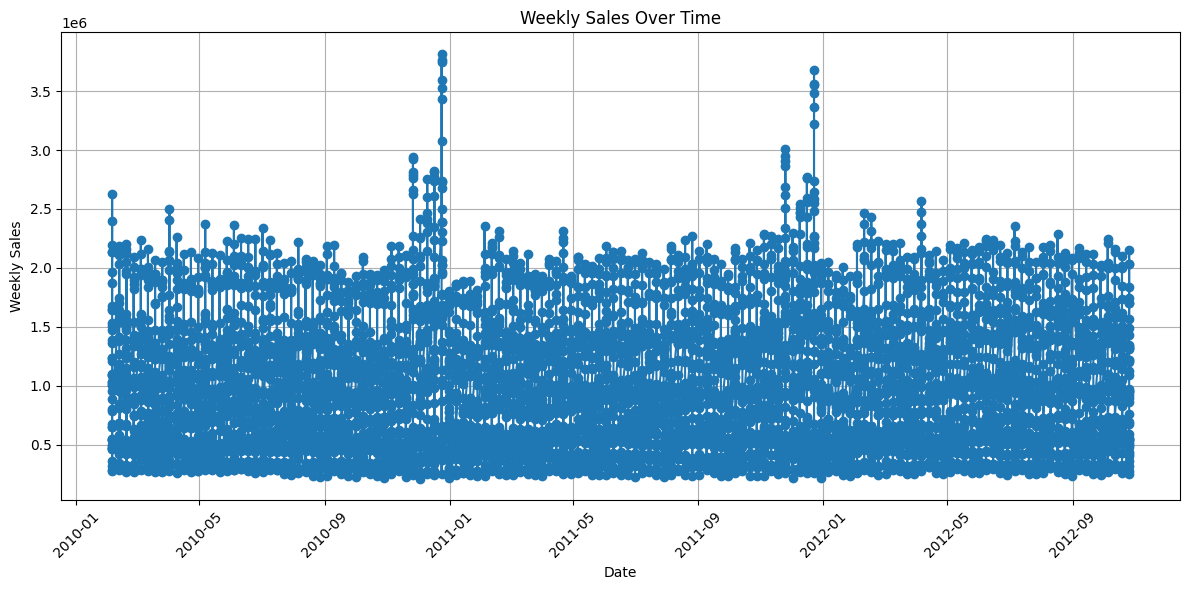

In [13]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the time series
plt.plot(weekly_sales_by_date['Date'], weekly_sales_by_date['Weekly_Sales'], marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### How have weekly sales at Walmart changed over the years?

In [14]:
# Group by year and calculate the sum of weekly sales for each year
df['Year'] = df['Date'].dt.year
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()
yearly_sales

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


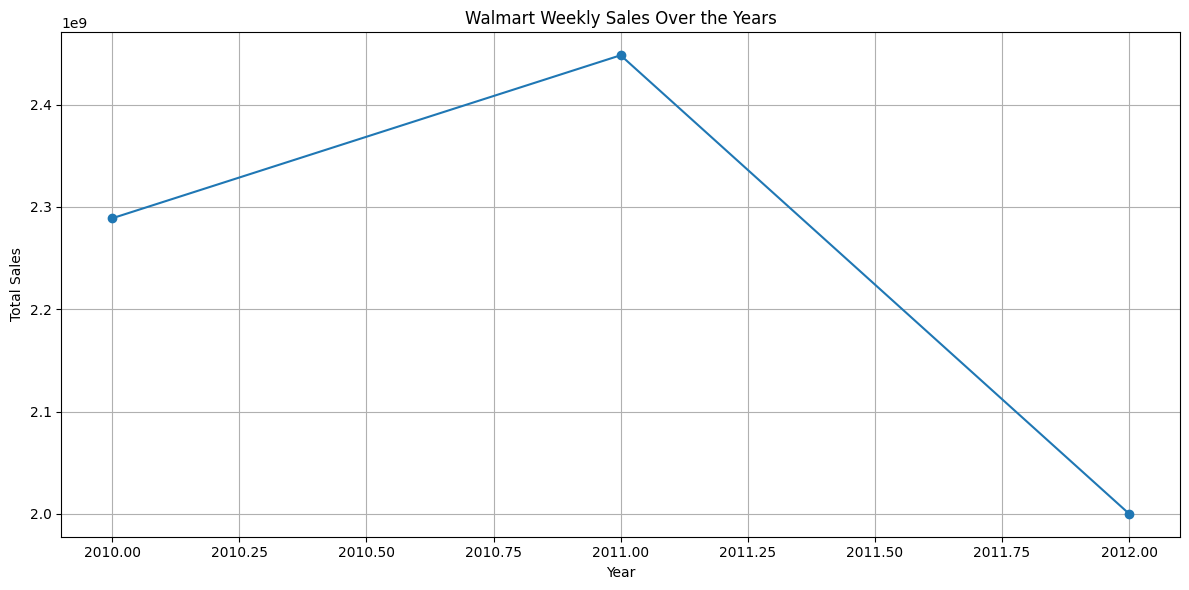

In [15]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the yearly sales trend
plt.plot(yearly_sales['Year'], yearly_sales['Weekly_Sales'], marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Walmart Weekly Sales Over the Years')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### How have weekly sales at Walmart changed over the Months?

In [16]:
# Group by year and calculate the sum of weekly sales for each year
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()
monthly_sales

,Month,Weekly_Sales
0,1,3.325984e+08
1,2,5.687279e+08
2,3,5.927859e+08
3,4,6.468598e+08
4,5,5.571256e+08
5,6,6.226299e+08
6,7,6.500010e+08
7,8,6.130902e+08
8,9,5.787612e+08
9,10,5.847848e+08


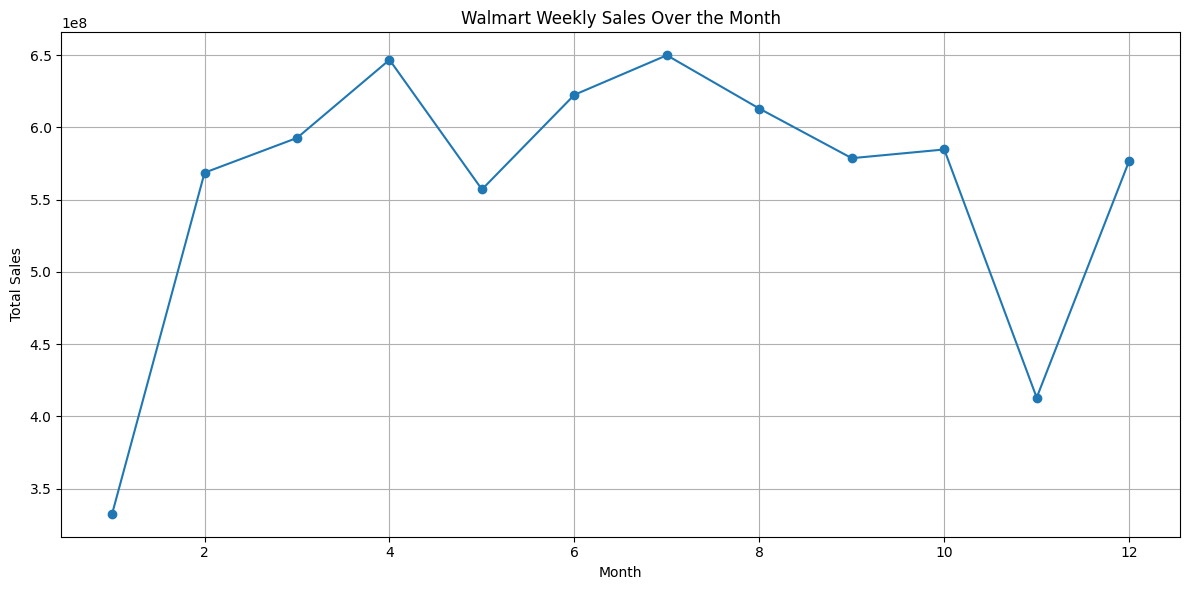

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the yearly sales trend
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker='o')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Walmart Weekly Sales Over the Month')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### What is the impact of holidays (Holiday flag) on weekly sales? 

In [18]:
# Group by date and calculate the sum of weekly sales for each date
daily_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
# Merge with the 'Holiday flag' column
daily_sales = daily_sales.merge(df[['Date', 'Holiday_Flag']], on='Date', how='left')
daily_sales

,Date,Weekly_Sales,Holiday_Flag
0,2010-02-05,49750740.50,0
1,2010-02-05,49750740.50,0
2,2010-02-05,49750740.50,0
3,2010-02-05,49750740.50,0
4,2010-02-05,49750740.50,0
...,...,...,...
6430,2012-10-26,45544116.29,0
6431,2012-10-26,45544116.29,0
6432,2012-10-26,45544116.29,0
6433,2012-10-26,45544116.29,0


In [19]:
# Separate sales data for holiday and non-holiday weeks
holiday_sales = daily_sales[daily_sales['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = daily_sales[daily_sales['Holiday_Flag'] == 0]['Weekly_Sales']

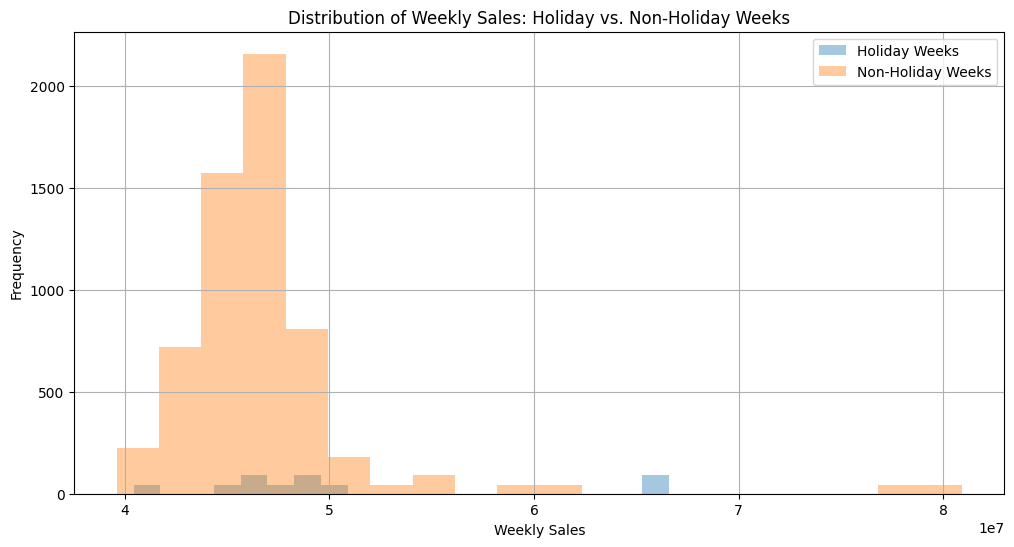

In [20]:
# Plot weekly sales for holiday and non-holiday weeks
plt.figure(figsize=(12, 6))
plt.hist(holiday_sales, alpha=0.4, label='Holiday Weeks',bins=20)
plt.hist(non_holiday_sales, alpha=0.4, label='Non-Holiday Weeks',bins=20)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.legend()
plt.grid(True)
plt.show()

### Is there a correlation between temperature and weekly sales? Do sales increase during certain temperature ranges?

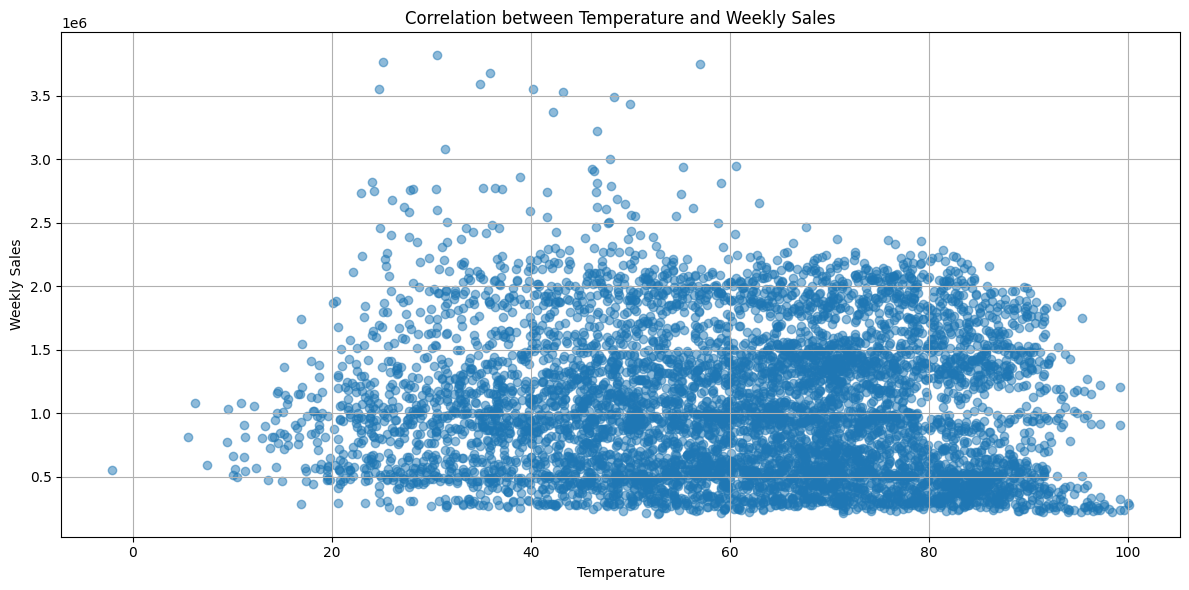

In [21]:
# Create a scatter plot of temperature vs. weekly sales
plt.figure(figsize=(12, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Correlation between Temperature and Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### How do fuel prices affect weekly sales at Walmart?

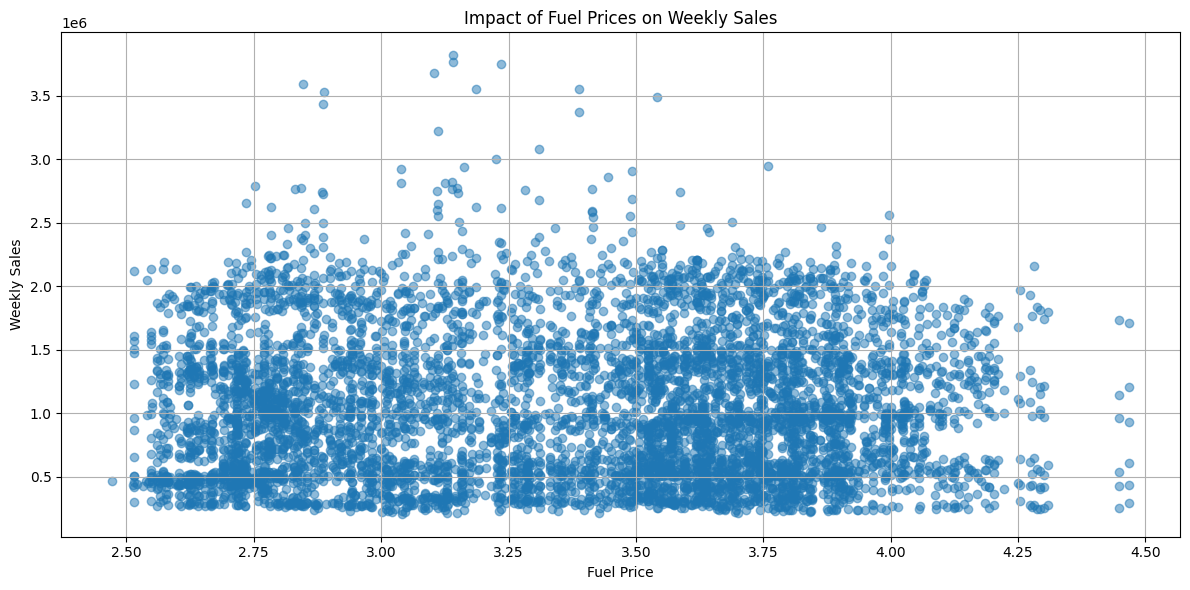

In [22]:
# Create a scatter plot of fuel price vs. weekly sales
plt.figure(figsize=(12, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5)
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Impact of Fuel Prices on Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Is there any relationship between the Consumer Price Index (CPI) and weekly sales? How do changes in CPI impact sales?

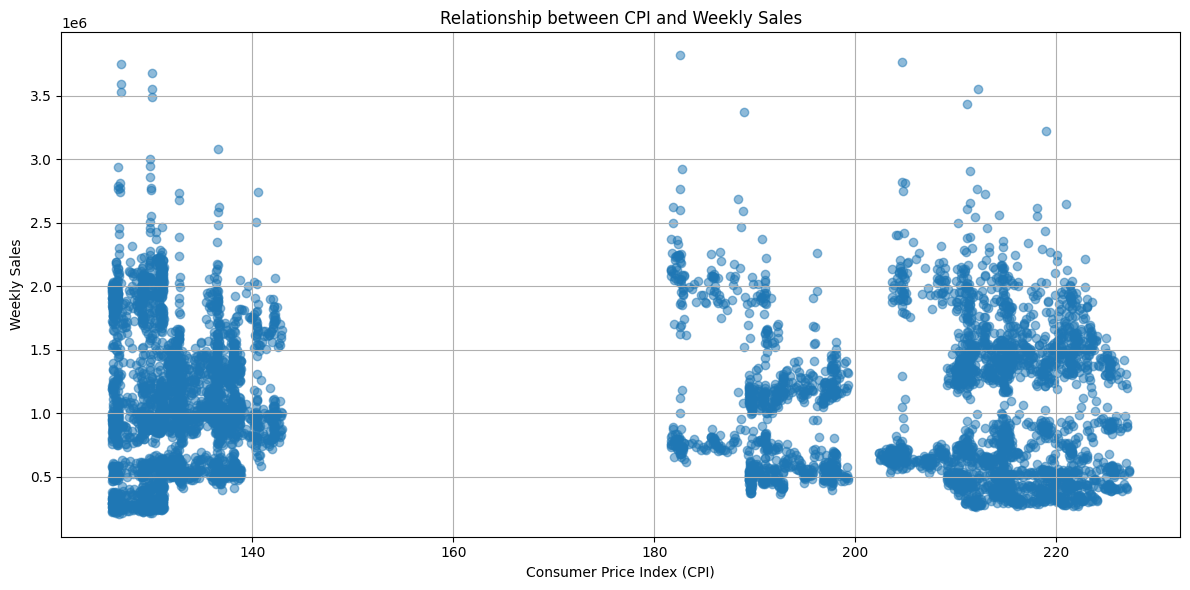

In [23]:
# Create a scatter plot of CPI vs. weekly sales
plt.figure(figsize=(12, 6))
plt.scatter(df['CPI'], df['Weekly_Sales'], alpha=0.5)
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.title('Relationship between CPI and Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Do variations in unemployment rates correlate with changes in weekly sales?

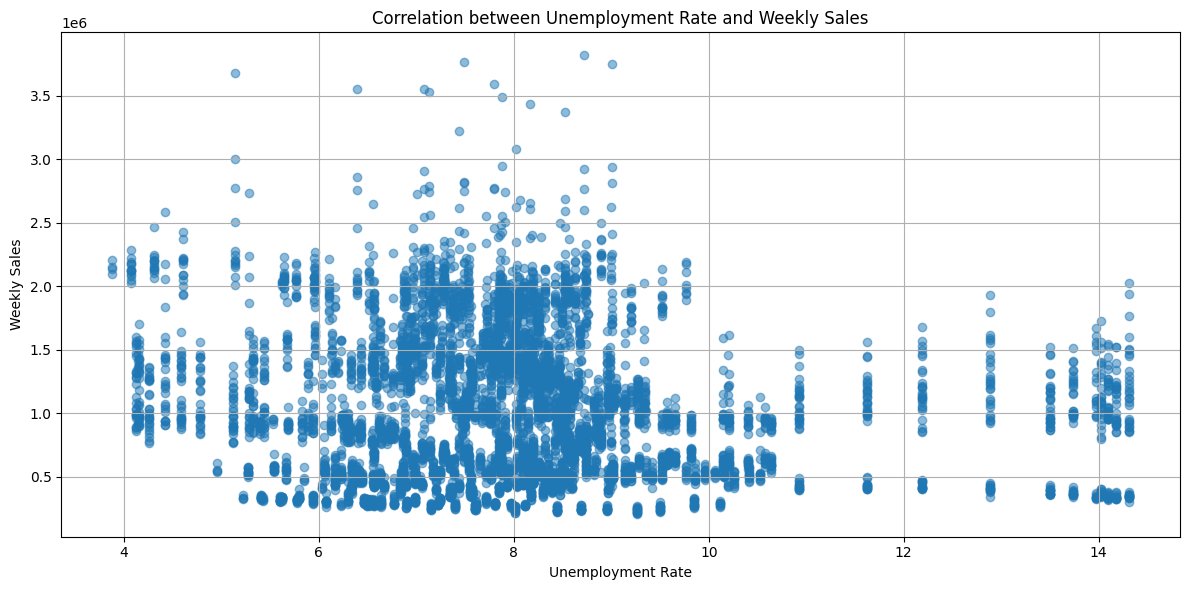

In [24]:
# Create a scatter plot of Unemployment vs. weekly sales
plt.figure(figsize=(12, 6))
plt.scatter(df['Unemployment'], df['Weekly_Sales'], alpha=0.5)
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.title('Correlation between Unemployment Rate and Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Are there significant correlations between the date and other factors (e.g., temperature, CPI, unemployment) that may explain sales variations?

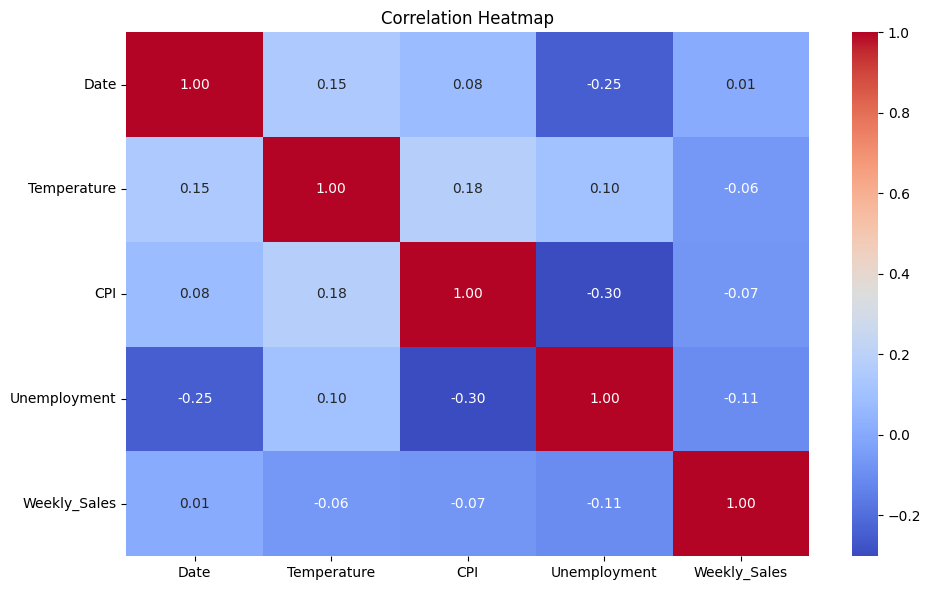

In [25]:
# Calculate correlations between date, temperature, CPI, unemployment, and weekly sales
correlations = df[['Date', 'Temperature', 'CPI', 'Unemployment', 'Weekly_Sales']].corr()
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [26]:
sales=df.groupby("Date")[["Weekly_Sales"]].sum()
sales

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


## Modeling

<Axes: xlabel='Date'>

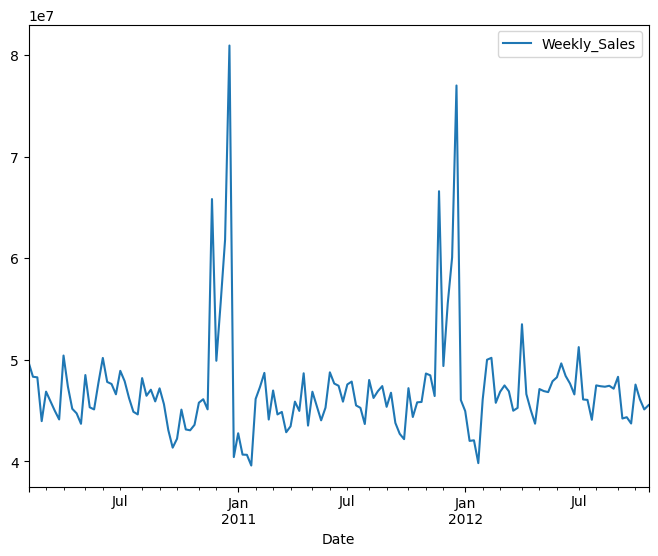

In [27]:
sales.plot()

In [28]:
df_weekly = sales['Weekly_Sales'].resample('1w').mean()
df_weekly

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
                 ...     
2012-09-30    43734899.40
2012-10-07    47566639.31
2012-10-14    46128514.25
2012-10-21    45122410.57
2012-10-28    45544116.29
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

<Axes: xlabel='Date'>

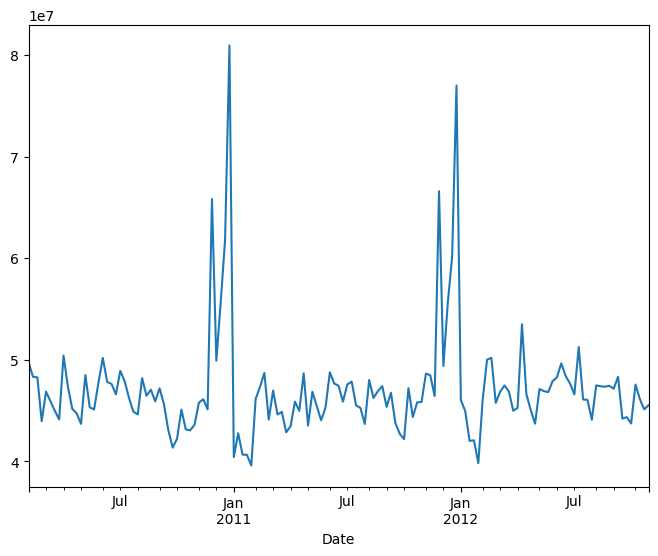

In [29]:
df_weekly.plot()

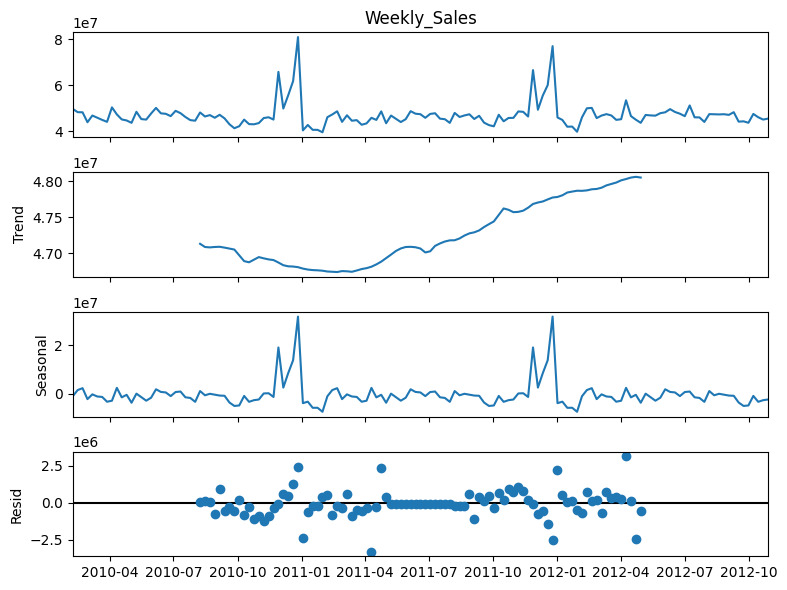

In [30]:
decomposition = sm.tsa.seasonal_decompose (df_weekly , model = 'additive')
decomposition.plot()
plt.show()

## Tests to check if data is stationary or not

In [31]:
rolmean = df_weekly.rolling(window=4).mean()
rolstd = df_weekly.rolling(window=4).std()
print (rolmean , rolstd)

Date
2010-02-07             NaN
2010-02-14             NaN
2010-02-21             NaN
2010-02-28    4.758325e+07
2010-03-07    4.686343e+07
                  ...     
2012-09-30    4.516139e+07
2012-10-07    4.497053e+07
2012-10-14    4.544615e+07
2012-10-21    4.563812e+07
2012-10-28    4.609042e+07
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64 Date
2010-02-07             NaN
2010-02-14             NaN
2010-02-21             NaN
2010-02-28    2.504187e+06
2010-03-07    2.045230e+06
                  ...     
2012-09-30    2.129258e+06
2012-10-07    1.751216e+06
2012-10-14    1.739930e+06
2012-10-21    1.617393e+06
2012-10-28    1.067109e+06
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64


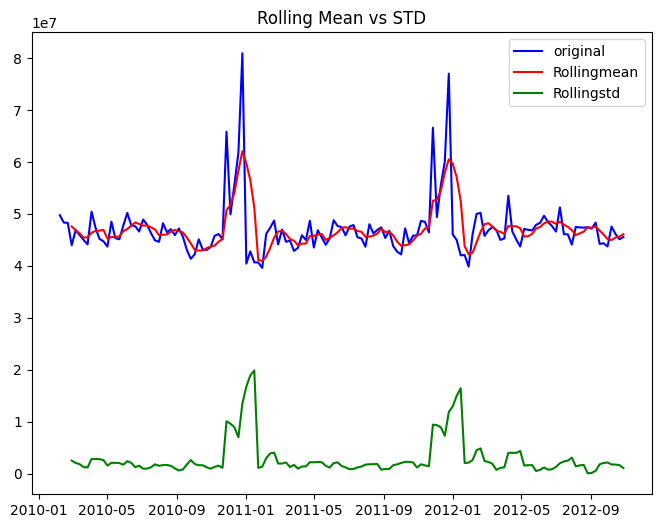

In [32]:
orig = plt.plot(df_weekly , color = "blue" , label = "original")
mean = plt.plot(rolmean , color = "red" , label = "Rollingmean")
std = plt.plot(rolstd , color = "green" , label = "Rollingstd")
plt.legend(loc = 'best')
plt.title("Rolling Mean vs STD")
plt.show()


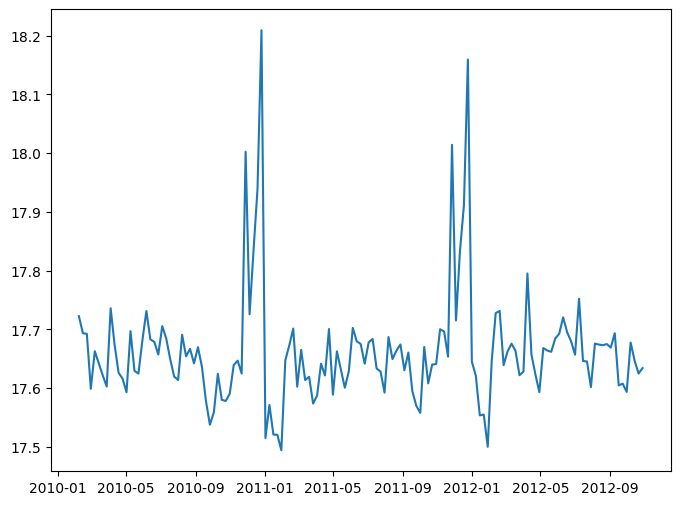

In [33]:
df_logScale = np.log(df_weekly)
plt.plot(df_logScale)

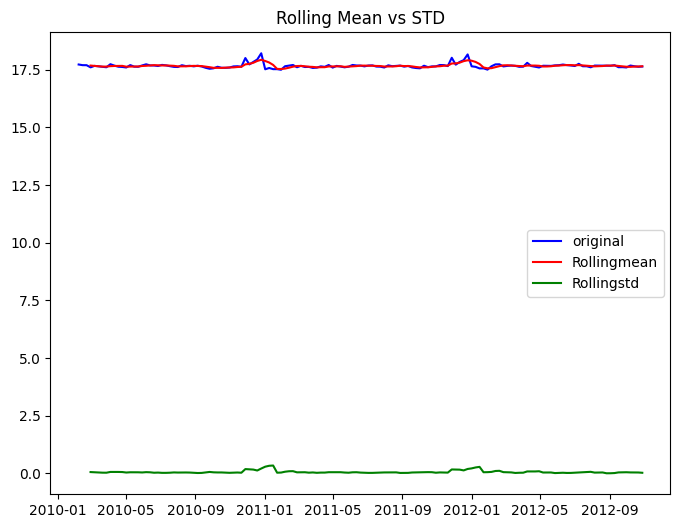

In [34]:
rolmean = df_logScale.rolling(window=4).mean()
rolstd = df_logScale.rolling(window=4).std()

orig = plt.plot(df_logScale , color = "blue" , label = "original")
mean = plt.plot(rolmean , color = "red" , label = "Rollingmean")
std = plt.plot(rolstd , color = "green" , label = "Rollingstd")
plt.legend(loc = 'best')
plt.title("Rolling Mean vs STD")
plt.show()


In [35]:
datasetLogScaleMinusMrolling = df_logScale - rolmean
datasetLogScaleMinusMrolling.head(12)

#Remove NAN values
datasetLogScaleMinusMrolling.dropna(inplace=True)
datasetLogScaleMinusMrolling.head(10)

Date
2010-02-28   -0.077936
2010-03-07    0.000902
2010-03-14   -0.006696
2010-03-21   -0.009663
2010-03-28   -0.029789
2010-04-04    0.085182
2010-04-11    0.014890
2010-04-18   -0.033344
2010-04-25   -0.046714
2010-05-02   -0.034243
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Date'>

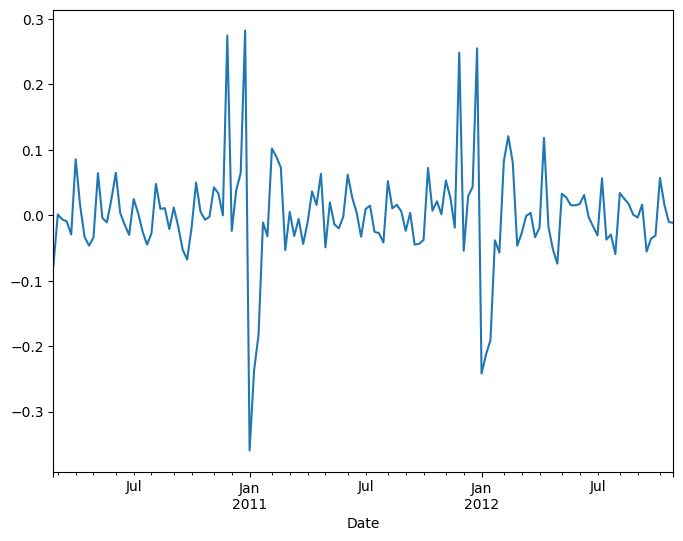

In [36]:
datasetLogScaleMinusMrolling.plot()

In [37]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    

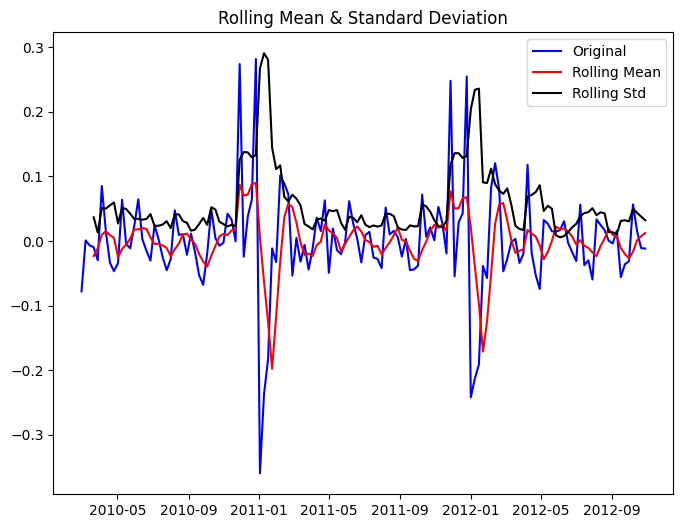

In [38]:
test_stationarity(datasetLogScaleMinusMrolling)

In [39]:
df_weekly.shape

(143,)

In [40]:
y_train = df_weekly[:110]
y_test = df_weekly[110:]

In [41]:
from statsmodels.tsa.arima_model import ARIMA

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  110
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1863.454
Date:                Wed, 06 Sep 2023   AIC                           3734.908
Time:                        15:28:18   BIC                           3745.637
Sample:                    02-07-2010   HQIC                          3739.258
                         - 03-11-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1972      0.053     -3.751      0.000      -0.300      -0.094
ar.L2         -0.0936      0.059     -1.589      0.112      -0.209       0.022
ma.L1         -1.0000      0.067    -14.834      0.0

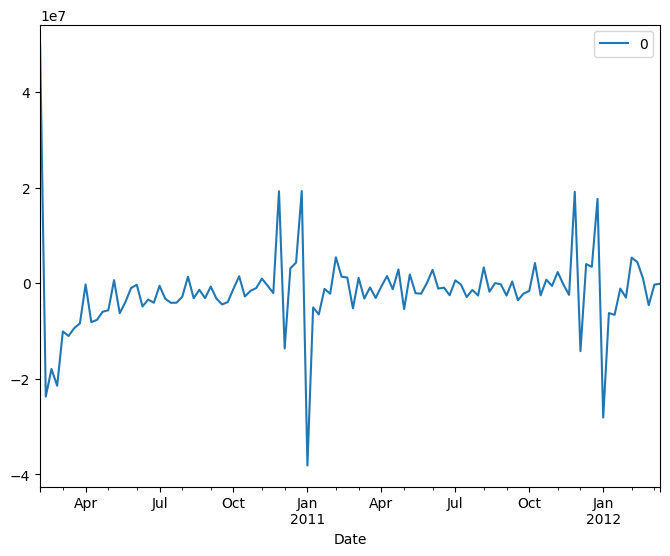

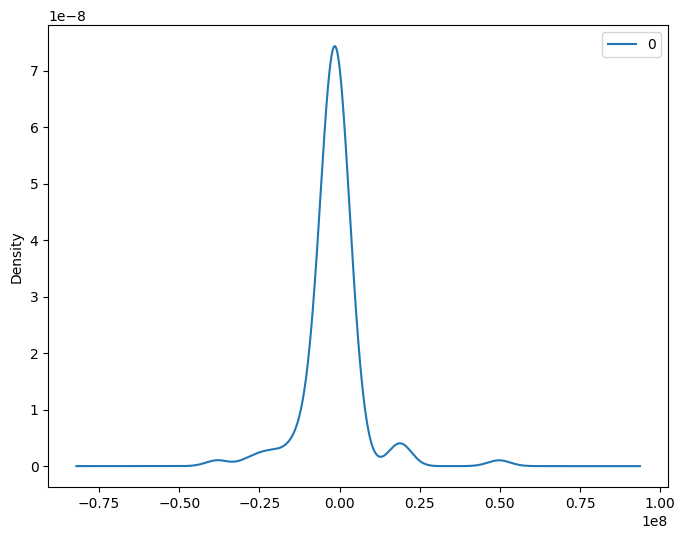

                  0
count  1.100000e+02
mean  -1.777096e+06
std    9.029190e+06
min   -3.812972e+07
25%   -4.022747e+06
50%   -1.483485e+06
75%    6.534511e+05
max    4.975074e+07


In [42]:
model = sm.tsa.arima.ARIMA(y_train , order = (2,2,1))
model1 = model.fit()
print(model1.summary())

res = pd.DataFrame(model1.resid)
res.plot()
plt.show()

res.plot(kind = 'kde')
plt.show()
print(res.describe())



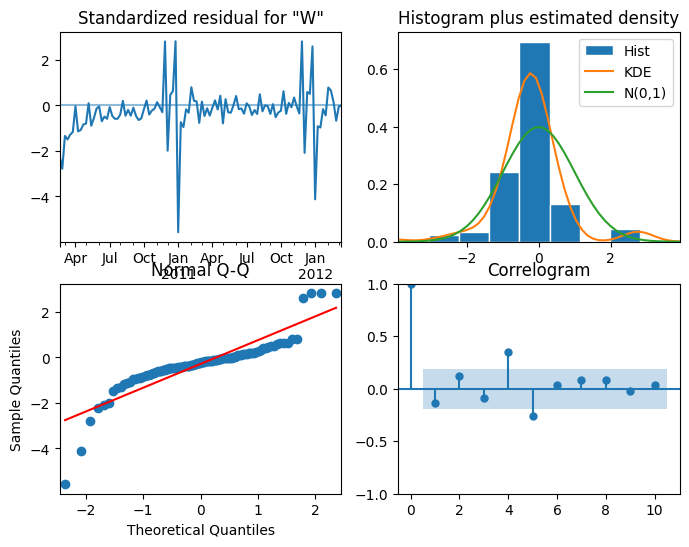

In [43]:
model1.plot_diagnostics()
plt.show()

## Auto ARIMA

In [44]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.9 MB/s eta 0:00:00


In [45]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df_weekly, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=8,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
print("AIC value : ",model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[8]             : AIC=4605.627, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=4670.045, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=4623.886, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=4603.756, Time=0.34 sec
 ARIMA(0,1,1)(0,1,0)[8]             : AIC=4648.338, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[8]             : AIC=4604.451, Time=0.38 sec
 ARIMA(0,1,1)(0,1,2)[8]             : AIC=4604.467, Time=0.59 sec
 ARIMA(0,1,1)(1,1,0)[8]             : AIC=4621.481, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[8]             : AIC=4606.450, Time=1.06 sec
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=4618.577, Time=0.18 sec
 ARIMA(0,1,2)(0,1,1)[8]             : AIC=4609.665, Time=0.33 sec
 ARIMA(1,1,0)(0,1,1)[8]             : AIC=4606.640, Time=0.27 sec
 ARIMA(1,1,2)(0,1,1)[8]             : AIC=4608.795, Time=0.59 sec
 ARIMA(0,1,1)(0,1,1)[8] intercept   : AIC=4605.511, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,1,1)

In [46]:
train = df_weekly.loc["2010-02-5":"2012-02-17"]
test = df_weekly.loc["2012-02-17":]

In [47]:
model.fit(train)
future_forecast =model.predict()

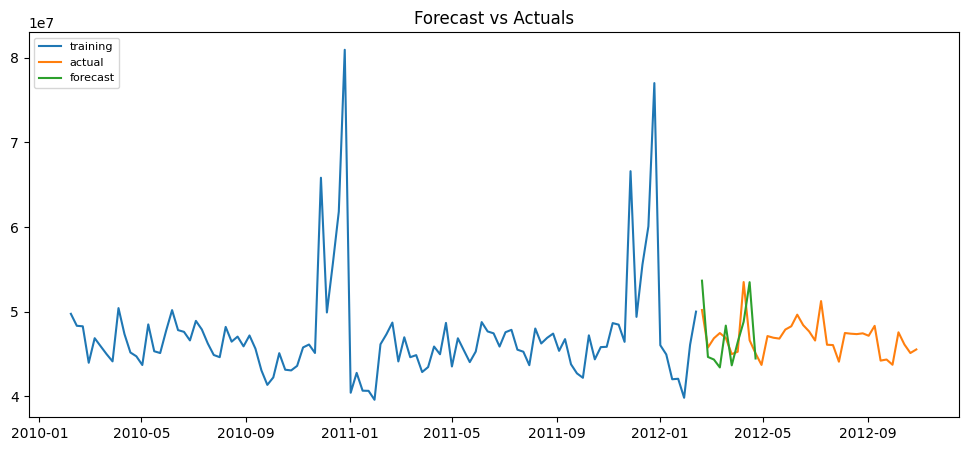

In [48]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(future_forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()